In [2]:
import pandas as pd
import os

In [3]:

# Read the CSV file
df = pd.read_csv('Data/cambodia-population-2023-11-20.csv')

# Filter the data for the desired range (2000 to 2030)
df_filtered = df[(df['date'] >= '2000-01-01') & (df['date'] <= '2030-12-31')]

# Select the 'date' and 'Births per 1000 People' columns
columns_selected = ['date', 'Births per 1000 People']
df_filtered = df_filtered[columns_selected]

# Convert 'date' column to datetime format
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Extract only the year part
df_filtered['date'] = df_filtered['date'].dt.year


df_filtered_birth = df_filtered.rename(columns={'date':'Year'})

# Display the modified DataFrame
print(df_filtered_birth)

output_folder = 'Processed_Data'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

output_file = f'{output_folder}/population-growth.csv'
df_filtered_birth.to_csv(output_file, index=False)

print(f"Data saved to {output_file}")

    Year  Births per 1000 People
50  2000                  29.028
51  2001                  28.169
52  2002                  27.309
53  2003                  26.450
54  2004                  26.411
55  2005                  26.372
56  2006                  26.334
57  2007                  26.295
58  2008                  26.256
59  2009                  25.910
60  2010                  25.564
61  2011                  25.217
62  2012                  24.871
63  2013                  24.525
64  2014                  24.165
65  2015                  23.805
66  2016                  23.445
67  2017                  23.085
68  2018                  22.725
69  2019                  22.260
70  2020                  21.795
71  2021                  21.330
72  2022                  20.865
73  2023                  20.400
74  2024                  20.038
75  2025                  19.675
76  2026                  19.313
77  2027                  18.950
78  2028                  18.588
79  2029  

# Economy and Education:

In [4]:
start_year = 2000
end_year = 2030

In [5]:

df = pd.read_csv('Data/API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_5994650.csv')

# Filter rows for Cambodia
cambodia_df = df[df['Country Name'] == 'Cambodia']

# Select relevant columns
gdp_columns = ['Country Name', '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009', '2010', '2011','2012','2013','2014','2015','2016','2017','2018']
cambodia_gdp = cambodia_df[gdp_columns]

# Transpose the DataFrame and reset index
df_filter = cambodia_gdp.T.reset_index()

# Set the first row as column headers
df_filter.columns = df_filter.iloc[0]

# Skip the first row (duplicate of headers) and rename columns
df_filter = df_filter[1:].rename(columns={'Country Name': 'Year', 'Cambodia': 'GDP'})
df_filter ['GDP'] = df_filter['GDP'].astype(float)


df_filter = pd.DataFrame(df_filter)

# Display the transposed DataFrame
print(df_filter)




0   Year        GDP
1   2000   9.993580
2   2001   8.148386
3   2002   6.578940
4   2003   8.505896
5   2004  10.340529
6   2005  13.250087
7   2006  10.771084
8   2007  10.212574
9   2008   6.691577
10  2009   0.086697
11  2010   5.963079
12  2011   7.069570
13  2012   7.313346
14  2013   7.356665
15  2014   7.142571
16  2015   6.965798
17  2016   6.933314
18  2017   6.996904
19  2018   7.469169


In [6]:

# Read the CSV file
df = pd.read_csv('Data/ifs.csv')

df_cleaned = df.dropna(axis=1, how='all',inplace=True)


feature_interested=[
    'Year',
    'GDPR[1]'
]
df_ifs = df[feature_interested]

df_ifs = df_ifs.rename(columns={'Country Name': 'Year', 'GDPR[1]': 'GDP'})
df_ifs['GDP'] = df_ifs['GDP'].astype(float)


df_ifs = pd.DataFrame(df_ifs)



# Display the modified DataFrame
print(df_ifs)



    Year       GDP
0   2019  7.054102
1   2020 -3.095996
2   2021  3.026377
3   2022  5.012025
4   2023  5.818995
..   ...       ...
77  2096  2.514916
78  2097  2.362878
79  2098  2.351536
80  2099  2.036743
81  2100  1.998398

[82 rows x 2 columns]


In [7]:
# Merge the dataframes
merged_gdp = df_filter.set_index('Year').combine_first(df_ifs.set_index('Year')).reset_index()

# Convert 'Year' column to integer type
merged_gdp['Year'] = merged_gdp['Year'].astype(int)

# Define the start and end year for filtering
start_year = 2000
end_year = 2030

# Filter the data between 2000 and 2030 inclusive
filtered_gdp_data = merged_gdp[(merged_gdp['Year'] >= start_year) & (merged_gdp['Year'] <= end_year)]

# Save the filtered DataFrame to a CSV file in the 'Processed_Data' folder
output_folder = 'Processed_Data'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

output_file = f'{output_folder}/gdp-growth.csv'
filtered_gdp_data.to_csv(output_file, index=False)

print(f"Data saved to {output_file}")

Data saved to Processed_Data/gdp-growth.csv


HDI

In [9]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('Data/HDI.csv')


df_cleaned = df.dropna(subset=['HDINEW[0]'])


df = df.filter(regex='^(?!Unnamed)')


features_of_interest = ['Year', 'HDINEW[0]']
df_hdi = df[features_of_interest]

start_year = 2000
end_year = 2030


filtered_hdi_data = df_hdi[(df_hdi['Year'] >= start_year) & (df_hdi['Year'] <= end_year)]
filtered_hdi_data = filtered_hdi_data.rename(columns={'HDINEW[0]': 'HDI'})

filtered_hdi_data.loc[filtered_hdi_data['Year'] == 2018, 'HDI'] = filtered_hdi_data.loc[filtered_hdi_data['Year'] == 2017, 'HDI'].values[0]

print(filtered_hdi_data)

# Save the filtered DataFrame to a CSV file in the 'Processed_Data' folder
output_folder = 'Processed_Data'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

output_file = f'{output_folder}/hdi-growth.csv'
filtered_hdi_data.to_csv(output_file, index=False)

print(f"Data saved to {output_file}")


    Year       HDI
40  2000  0.420000
41  2001  0.434000
42  2002  0.453000
43  2003  0.466000
44  2004  0.478000
45  2005  0.490000
46  2006  0.502000
47  2007  0.513000
48  2008  0.521000
49  2009  0.521000
50  2010  0.537000
51  2011  0.546000
52  2012  0.553000
53  2013  0.560000
54  2014  0.566000
55  2015  0.571000
56  2016  0.576000
57  2017  0.582000
58  2018  0.582000
59  2019  0.571450
60  2020  0.571319
61  2021  0.575063
62  2022  0.581805
63  2023  0.586869
64  2024  0.592452
65  2025  0.597931
66  2026  0.602447
67  2027  0.607306
68  2028  0.612321
69  2029  0.617578
70  2030  0.622934
Data saved to Processed_Data/hdi-growth.csv


# Birth Data:

In [11]:

# Assuming your dataset is stored in a CSV file named "IDB5YR.IDB5YEAR-2023-11-21T140834.csv"
data = pd.read_csv("Data/IDB5YR.IDB5YEAR-2023-11-21T140834.csv")

filtered_data = data[(data['Year (time)'] >= start_year) & (data['Year (time)'] <= end_year)]

# Select the specific factors of interest
factors_of_interest = ['Year (time)',
                      
                       'Total mortality rates under 5 years of age (MR0_4)'
                       ]

# Filter the dataset to include only the selected factors
filtered_data = filtered_data[factors_of_interest]

# Rename the columns in the filtered dataset
filtered_data = filtered_data.rename(columns={
    'Year (time)': 'Year',

    'Total mortality rates under 5 years of age (MR0_4)': 'Child mortality rate'
    # Add more columns as needed
})

# Convert the filtered data to a dataframe
filtered_dataframe = pd.DataFrame(filtered_data)

# Print the filtered DataFrame
print(filtered_dataframe)

# Save the filtered DataFrame to a CSV file in the 'Processed_Data' folder
output_folder = 'Processed_Data'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

output_file = f'{output_folder}/mortality-rate.csv'
filtered_dataframe.to_csv(output_file, index=False)

print(f"Data saved to {output_file}")


    Year  Child mortality rate
38  2000                117.73
39  2001                113.89
40  2002                110.62
41  2003                100.59
42  2004                 91.47
43  2005                 83.17
44  2006                 75.64
45  2007                 68.80
46  2008                 62.58
47  2009                 60.03
48  2010                 57.60
49  2011                 55.27
50  2012                 53.04
51  2013                 50.91
52  2014                 48.87
53  2015                 46.92
54  2016                 45.06
55  2017                 43.27
56  2018                 42.00
57  2019                 40.74
58  2020                 40.74
59  2021                 40.74
60  2022                 39.54
61  2023                 38.36
62  2024                 37.22
63  2025                 36.12
64  2026                 35.05
65  2027                 34.00
66  2028                 33.00
67  2029                 32.01
68  2030                 31.06
Data sav

In [12]:

# Assuming your dataset is stored in a CSV file named "IDB5YR.IDB5YEAR-2023-11-21T140834.csv"
data = pd.read_csv("Data/IDB5YR.IDB5YEAR-2023-11-21T140834.csv")

filtered_data = data[(data['Year (time)'] >= start_year) & (data['Year (time)'] <= end_year)]

# Select the specific factors of interest
factors_of_interest = ['Year (time)',
                       'Total fertility rate (TFR)'
                       ]

# Filter the dataset to include only the selected factors
filtered_data = filtered_data[factors_of_interest]

# Rename the columns in the filtered dataset
filtered_data = filtered_data.rename(columns={
    'Year (time)': 'Year',
    'Total fertility rate (TFR)': 'Fertility Rate'
    # Add more columns as needed
})

# Convert the filtered data to a dataframe
filtered_dataframe = pd.DataFrame(filtered_data)

# Print the filtered DataFrame
print(filtered_dataframe)

# Save the filtered DataFrame to a CSV file in the 'Processed_Data' folder
output_folder = 'Processed_Data'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

output_file = f'{output_folder}/fertility-rate.csv'
filtered_dataframe.to_csv(output_file, index=False)

print(f"Data saved to {output_file}")


    Year  Fertility Rate
38  2000          3.7660
39  2001          3.6540
40  2002          3.5420
41  2003          3.4300
42  2004          3.3610
43  2005          3.2920
44  2006          3.2230
45  2007          3.1540
46  2008          3.0850
47  2009          2.9913
48  2010          2.8975
49  2011          2.8038
50  2012          2.7100
51  2013          2.6767
52  2014          2.6433
53  2015          2.6100
54  2016          2.5767
55  2017          2.5433
56  2018          2.5100
57  2019          2.4152
58  2020          2.3203
59  2021          2.2791
60  2022          2.2404
61  2023          2.2040
62  2024          2.1698
63  2025          2.1378
64  2026          2.1078
65  2027          2.0796
66  2028          2.0533
67  2029          2.0288
68  2030          2.0058
Data saved to Processed_Data/fertility-rate.csv


In [13]:
# Assuming your dataset is stored in a CSV file named "IDB5YR.IDB5YEAR-2023-11-21T140834.csv"
data = pd.read_csv("Data/IDB5YR.IDB5YEAR-2023-11-21T140834.csv")

filtered_data = data[(data['Year (time)'] >= start_year) & (data['Year (time)'] <= end_year)]

# Select the specific factors of interest
factors_of_interest = ['Year (time)',
                
                       'Population density (total population divided by area in square kilometers) (POP_DENS)'
                      
                       ]

# Filter the dataset to include only the selected factors
filtered_data = filtered_data[factors_of_interest]

# Rename the columns in the filtered dataset
filtered_data = filtered_data.rename(columns={
    'Year (time)': 'Year',
    'Population density (total population divided by area in square kilometers) (POP_DENS)': 'Population Density'
 
    # Add more columns as needed
})

# Convert the filtered data to a dataframe
filtered_dataframe = pd.DataFrame(filtered_data)

# Print the filtered DataFrame
print(filtered_dataframe)

# Save the filtered DataFrame to a CSV file in the 'Processed_Data' folder
output_folder = 'Processed_Data'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

output_file = f'{output_folder}/population-density.csv'
filtered_dataframe.to_csv(output_file, index=False)

print(f"Data saved to {output_file}")

    Year  Population Density
38  2000                70.6
39  2001                71.7
40  2002                72.7
41  2003                73.8
42  2004                74.9
43  2005                76.1
44  2006                77.1
45  2007                78.1
46  2008                79.1
47  2009                80.2
48  2010                81.2
49  2011                82.1
50  2012                83.0
51  2013                83.9
52  2014                84.8
53  2015                85.9
54  2016                87.3
55  2017                88.7
56  2018                90.1
57  2019                91.4
58  2020                92.6
59  2021                93.6
60  2022                94.7
61  2023                95.7
62  2024                96.7
63  2025                97.6
64  2026                98.5
65  2027                99.4
66  2028               100.3
67  2029               101.1
68  2030               101.9
Data saved to Processed_Data/population-density.csv


In [16]:

merged_data = pd.merge(df_filtered_birth, filtered_dataframe, on='Year', how='inner')

# Merge the result of the previous merge with filtered_gdp_data on 'Year' column
merged_data = pd.merge(merged_data, filtered_gdp_data, on='Year', how='inner')


merged_data = pd.merge(merged_data,filtered_hdi_data, on='Year', how='inner')



# print(merged_data.dtypes)

print(merged_data)

# Save the filtered DataFrame to a CSV file in the 'Processed_Data' folder
output_folder = 'Processed_Data'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

output_file = f'{output_folder}/birth-rate.csv'
merged_data.to_csv(output_file, index=False)

print(f"Data saved to {output_file}")






    Year  Births per 1000 People  Population Density        GDP       HDI
0   2000                  29.028                70.6   9.993580  0.420000
1   2001                  28.169                71.7   8.148386  0.434000
2   2002                  27.309                72.7   6.578940  0.453000
3   2003                  26.450                73.8   8.505896  0.466000
4   2004                  26.411                74.9  10.340529  0.478000
5   2005                  26.372                76.1  13.250087  0.490000
6   2006                  26.334                77.1  10.771084  0.502000
7   2007                  26.295                78.1  10.212574  0.513000
8   2008                  26.256                79.1   6.691577  0.521000
9   2009                  25.910                80.2   0.086697  0.521000
10  2010                  25.564                81.2   5.963079  0.537000
11  2011                  25.217                82.1   7.069570  0.546000
12  2012                  24.871      

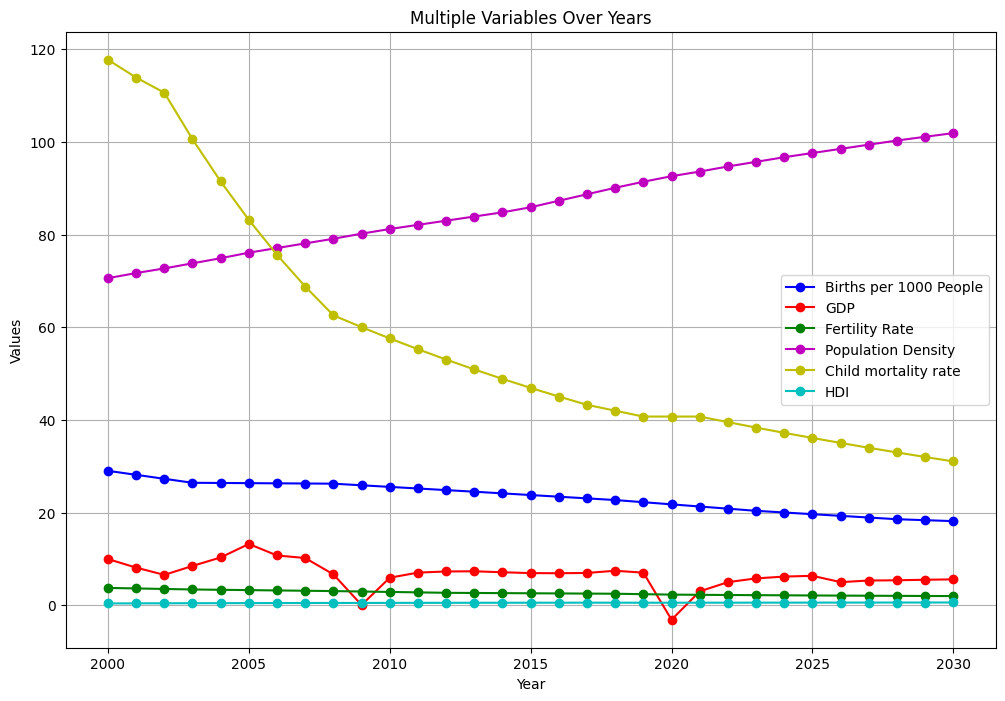

In [10]:
import matplotlib.pyplot as plt

# Assuming 'merged_data' is your merged DataFrame

plt.figure(figsize=(12, 8))

# Plotting multiple columns on the same graph
plt.plot(merged_data['Year'], merged_data['Births per 1000 People'], marker='o', linestyle='-', color='b', label='Births per 1000 People')
plt.plot(merged_data['Year'], merged_data['GDP'], marker='o', linestyle='-', color='r', label='GDP')
plt.plot(merged_data['Year'], merged_data['Fertility Rate'], marker='o', linestyle='-', color='g', label='Fertility Rate')
plt.plot(merged_data['Year'], merged_data['Population Density'], marker='o', linestyle='-', color='m', label='Population Density')
plt.plot(merged_data['Year'], merged_data['Child mortality rate'], marker='o', linestyle='-', color='y', label='Child mortality rate')
plt.plot(merged_data['Year'], merged_data['HDI'], marker='o', linestyle='-', color='c', label='HDI')
# Add more plots as needed

plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Multiple Variables Over Years')
plt.legend()
plt.grid(True)
plt.show()


# Normalize the Data:

In [11]:
merged_data.shape


(31, 7)

In [12]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns = ['Births per 1000 People', 'Fertility Rate', 'Population Density', 'Child mortality rate', 'GDP', 'HDI']

data_to_normalize = merged_data[numeric_columns]

scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(data_to_normalize)

normalized_df = pd.DataFrame(normalized_data, columns=numeric_columns)


merged_data[numeric_columns] = normalized_df



In [13]:
merged_data.shape

(31, 7)

In [14]:
merged_data.describe()

,Year,Births per 1000 People,Fertility Rate,Population Density,Child mortality rate,GDP,HDI
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,2015.000000,0.482301,0.390932,0.511388,0.298939,0.594215,0.634321
std,9.092121,0.292351,0.301834,0.311366,0.298183,0.183424,0.273540
min,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.500000,0.226364,0.122941,0.255591,0.091035,0.530230,0.477989
50%,2015.000000,0.518706,0.343256,0.488818,0.182993,0.613560,0.744086
75%,2022.500000,0.746360,0.632712,0.785942,0.399562,0.642901,0.810287
max,2030.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
